# Import modules

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Read dataset

In [2]:
df=pd.read_csv("../data/Admission_Predict_Ver1.1.csv")
df=df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "Chance of Admit ": "Admission_Chance"})
df=df.drop("Serial No.",axis=1)
df.head(10)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
df.describe()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Display dataset

<AxesSubplot:>

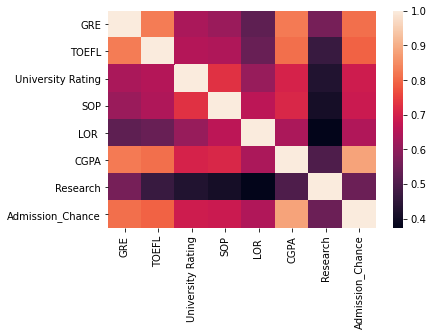

In [4]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Create model

In [5]:
model = Sequential(name = 'Regression')
model.add(Dense(16, input_shape=(7,), activation='relu'))
model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


# Convert data to arrays

In [6]:
X=np.asarray(df.drop("Admission_Chance",axis=1))
Y=np.asarray(df["Admission_Chance"])

# Train test split and scale

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
     X,Y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Train the model

In [8]:
history = model.fit(x=X_train, y=y_train, epochs=40, batch_size=3)

Epoch 1/40
134/134 [==============================] - 4s 4ms/step - loss: 0.2645
Epoch 2/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0535
Epoch 3/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0329
Epoch 4/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0236
Epoch 5/40
134/134 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 6/40
134/134 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 7/40
134/134 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 8/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0106
Epoch 9/40
134/134 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 10/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0080
Epoch 11/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0073
Epoch 12/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 13/40
134/134 [====

# Plot history

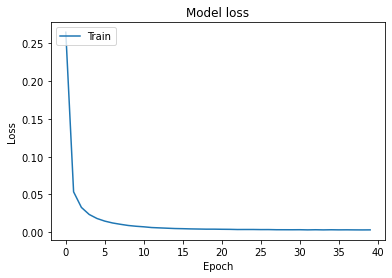

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Predict and evaluate

In [13]:
from sklearn.metrics import accuracy_score
prediction = model.predict(X_test)


In [14]:
train_error =  np.abs(y_test - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

In [15]:
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  0.12769926434776968
mean_error:  0.18317100712490084
min_error:  2.0384788512739505e-06
max_error:  0.6813194608688354


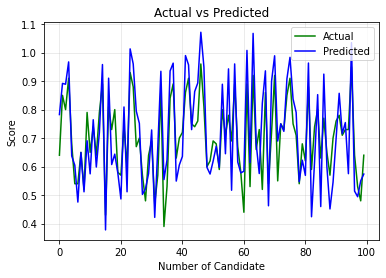

In [16]:
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,prediction))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(model.predict(X_test[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(model.predict(X_test[[2],:])))

train_prediction = model.predict(X_train)
print("r_square score (train dataset): ", r2_score(y_train,train_prediction))

r_square score:  0.4666381672612834
real value of y_test[1]: 0.85 -> the predict: [[0.8919269]]
real value of y_test[2]: 0.8 -> the predict: [[0.8890007]]
r_square score (train dataset):  0.8452958869012103


In [18]:
model.save('model_1.h5')

In [21]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "Regression", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 7], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 7], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 8, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_re